# Tactical Asset Allocation

https://www.investopedia.com/terms/t/tacticalassetallocation.asp

### Tactical Asset Allocation (TAA) Basics 
Cash = 10%  
Bonds = 35%  
Stocks = 45%  
Commodities = 10%  

Cash = 5%  
Bonds = 35%  
Stocks = 45%  
Commodities = 15%  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
Cash = 100000.00
Cash_5 = Cash * 0.05

In [3]:
print('How much cash left to invest?')
cash_to_invest = Cash - Cash_5
print(round(cash_to_invest, 2))

How much cash left to invest?
95000.0


In [4]:
# input
symbols = ['ZROZ','AAPL','SB']
start = '2012-01-01'
end = '2019-01-01'
title = "Tactical Asset Allocation"

In [5]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
7 years


In [7]:
df.head()

,ZROZ,AAPL,SB
Date,,,
2012-01-03,86.308502,50.857235,5.310326
2012-01-04,85.031059,51.130558,5.412774
2012-01-05,84.007576,51.698215,5.634750
2012-01-06,85.086624,52.238651,5.566450
2012-01-09,84.777161,52.155792,5.592062


In [8]:
df.tail()

,ZROZ,AAPL,SB
Date,,,
2018-12-24,110.195335,143.924454,1.72
2018-12-26,108.613121,154.059814,1.79
2018-12-27,108.159683,153.059998,1.78
2018-12-28,108.685097,153.138428,1.74
2018-12-31,109.453789,154.618546,1.78


In [9]:
print('Percentage of invest:')
percent_invest = [0.35, 0.45, 0.15]
names = ['Bonds', 'Stocks', 'Commodities']
for i, x in zip(names, percent_invest):
    cost = x * cash_to_invest
    print('{}: {}'.format(i, cost))

Percentage of invest:
Bonds: 33250.0
Stocks: 42750.0
Commodities: 14250.0


In [10]:
df.iloc[0]

ZROZ    86.308502
AAPL    50.857235
SB       5.310326
Name: 2012-01-03 00:00:00, dtype: float64

In [11]:
df.ix[-1]

ZROZ    109.453789
AAPL    154.618546
SB        1.780000
Name: 2018-12-31 00:00:00, dtype: float64

In [12]:
print('Number of Shares:')
percent_invest = [0.35, 0.45, 0.15]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * cash_to_invest
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
ZROZ: 385
AAPL: 840
SB: 2683


In [13]:
print('Beginning Value:')
percent_invest = [0.35, 0.45, 0.15]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * cash_to_invest
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
ZROZ: $33228.77
AAPL: $42720.08
SB: $14247.6


In [14]:
print('Current Value:')
percent_invest = [0.35, 0.45, 0.15]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    shares = int(cost/x)
    Begin_Value = round(shares * y, 2)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
ZROZ: $4456301.56
AAPL: $4896150.86
SB: $169100.0


In [15]:
result = []
percent_invest = [0.35, 0.45, 0.15]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    shares = int(cost/x)
    Begin_Value = round(shares * y, 2)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $9521552.42


In [16]:
# Calculate Daily Returns
returns = df.pct_change()
returns = returns.dropna()

In [17]:
# Calculate mean returns
meanDailyReturns = returns.mean()
print(meanDailyReturns)

ZROZ    0.000211
AAPL    0.000761
SB      0.000202
dtype: float64


In [18]:
# Calculate std returns
stdDailyReturns = returns.std()
print(stdDailyReturns)

ZROZ    0.012353
AAPL    0.016042
SB      0.040456
dtype: float64


In [19]:
# Define weights for the portfolio
weights = np.array([0.35, 0.45, 0.15])

In [20]:
# Calculate the covariance matrix on daily returns
cov_matrix = (returns.cov())*250
print (cov_matrix)

          ZROZ      AAPL        SB
ZROZ  0.038151 -0.009752 -0.018241
AAPL -0.009752  0.064337  0.033587
SB   -0.018241  0.033587  0.409162


In [21]:
# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

In [22]:
# Print the portfolio return
print(portReturn)

0.00044689842456079347


In [23]:
# Create portfolio returns column
returns['Portfolio'] = returns.dot(weights)

In [24]:
returns.head()

,ZROZ,AAPL,SB,Portfolio
Date,,,,
2012-01-04,-0.014801,0.005374,0.019292,0.000132
2012-01-05,-0.012037,0.011102,0.041010,0.006935
2012-01-06,0.012845,0.010454,-0.012121,0.007382
2012-01-09,-0.003637,-0.001586,0.004601,-0.001297
2012-01-10,-0.002807,0.003581,0.010687,0.002232


In [25]:
returns.tail()

,ZROZ,AAPL,SB,Portfolio
Date,,,,
2018-12-24,0.006255,-0.025874,-0.011494,-0.011178
2018-12-26,-0.014358,0.070421,0.040698,0.032769
2018-12-27,-0.004175,-0.006490,-0.005587,-0.005220
2018-12-28,0.004858,0.000512,-0.022472,-0.001440
2018-12-31,0.007073,0.009665,0.022988,0.010273


In [26]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

                ZROZ      AAPL        SB  Portfolio
Date                                               
2018-12-24  1.276761  2.829970  0.323897   1.929088
2018-12-26  1.258429  3.029261  0.337079   1.992302
2018-12-27  1.253175  3.009601  0.335196   1.981903
2018-12-28  1.259263  3.011143  0.327664   1.979049
2018-12-31  1.268169  3.040247  0.335196   1.999380


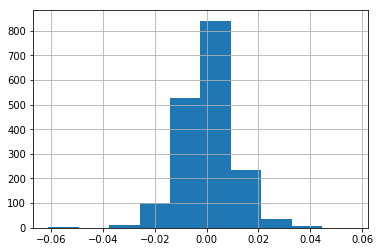

In [27]:
returns['Portfolio'].hist()
plt.show()

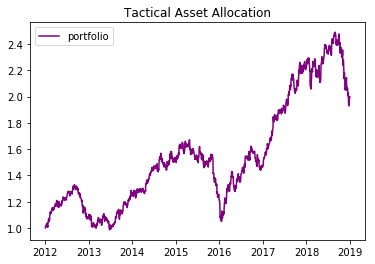

In [28]:
import matplotlib.dates

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.title(title)
plt.legend()
plt.show()

In [29]:
# Print the mean
print("mean : ", returns['Portfolio'].mean()*100)

# Print the standard deviation
print("Std. dev: ", returns['Portfolio'].std()*100)

# Print the skewness
print("skew: ", returns['Portfolio'].skew())

# Print the kurtosis
print("kurt: ", returns['Portfolio'].kurtosis())

mean :  0.044689842456079355
Std. dev:  1.0286902760363137
skew:  -0.18568585625514625
kurt:  3.1348800818141016


In [30]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

16.27%


In [31]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

2.65%


In [32]:
# Calculate total return and annualized return from price data 
total_return = (returns['Portfolio'][-1] - returns['Portfolio'][0]) / returns['Portfolio'][0]

# Annualize the total return over 5 year 
annualized_return = ((total_return + 1)**(1/5))-1

In [33]:
# Calculate annualized volatility from the standard deviation
vol_port = returns['Portfolio'].std() * np.sqrt(250)

In [34]:
# Calculate the Sharpe ratio 
rf = 0.01
sharpe_ratio = ((annualized_return - rf) / vol_port)
print(sharpe_ratio)

8.479402639933092


In [35]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns['Portfolio'] < target]

# Calculate expected return and std dev of downside
expected_return = returns['Portfolio'].mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  0.044689842456079355
--------------------------------------------------
Downside risk:
ZROZ         1.330979
AAPL         1.392202
SB           3.547902
Portfolio    0.711117
dtype: float64
--------------------------------------------------
Sortino ratio:
ZROZ        -0.717750
AAPL        -0.686186
SB          -0.269261
Portfolio   -1.343393
dtype: float64


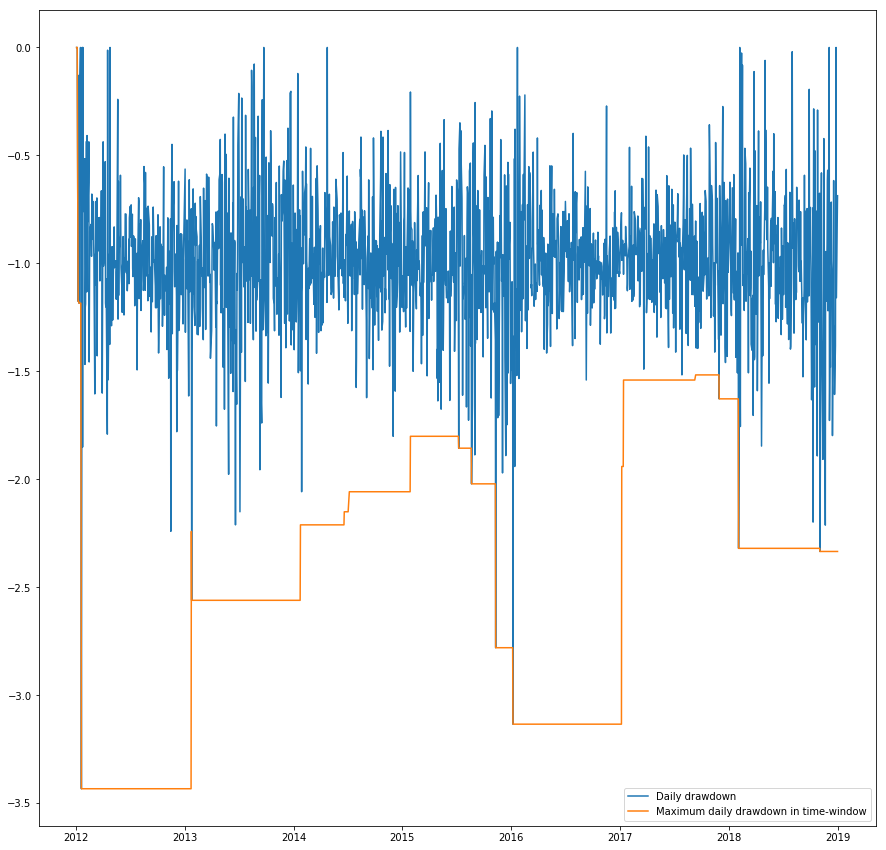

In [36]:
# Calculate the max value 
roll_max = returns['Portfolio'].rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns['Portfolio']/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

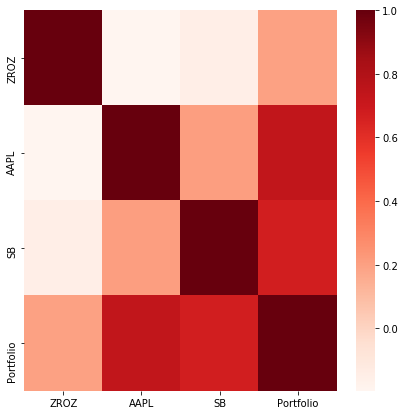

In [37]:
plt.figure(figsize=(7,7))
corr = returns.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

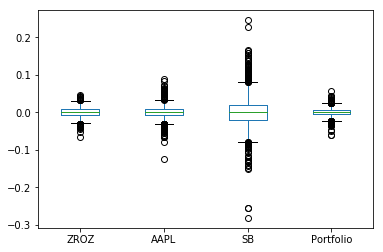

In [38]:
# Box plot
returns.plot(kind='box')

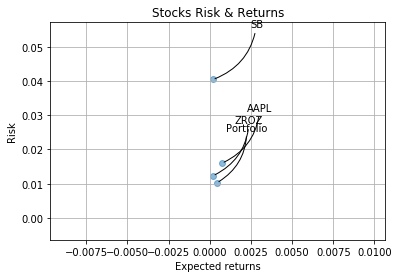

In [39]:
rets = returns.dropna()

plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

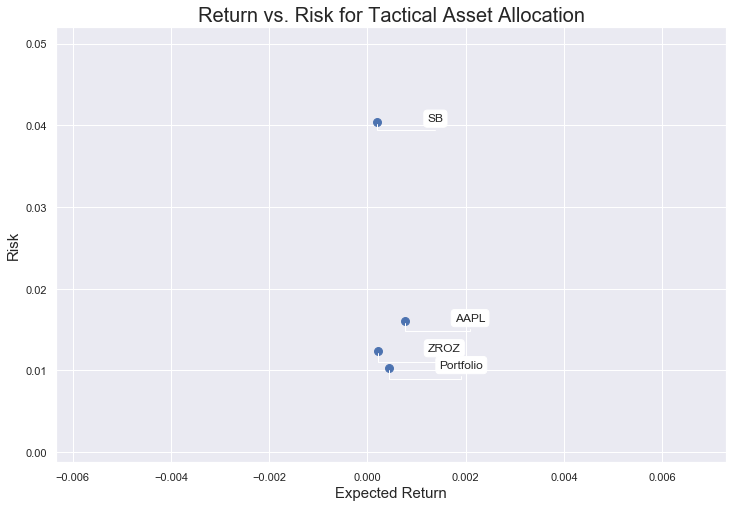

In [40]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for " + title, fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [41]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risk:")
print(rets.std())

Stock returns: 
ZROZ         0.000211
AAPL         0.000761
SB           0.000202
Portfolio    0.000447
dtype: float64
--------------------------------------------------
Stock risk:
ZROZ         0.012353
AAPL         0.016042
SB           0.040456
Portfolio    0.010287
dtype: float64


In [42]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
SB,0.000202,0.040456
ZROZ,0.000211,0.012353
Portfolio,0.000447,0.010287
AAPL,0.000761,0.016042


In [43]:
table.sort_values(by='Risk')

,Returns,Risk
Portfolio,0.000447,0.010287
ZROZ,0.000211,0.012353
AAPL,0.000761,0.016042
SB,0.000202,0.040456


In [44]:
rf = 0.01
table['Sharpe_Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe_Ratio
ZROZ,0.000211,0.012353,-0.792385
AAPL,0.000761,0.016042,-0.575910
SB,0.000202,0.040456,-0.242185
Portfolio,0.000447,0.010287,-0.928666
